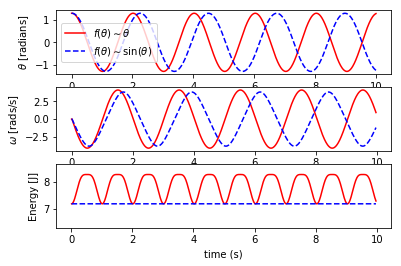

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import math as m
import numpy as np
#import verlet as vr

def verlet(f,a,b,xf,niter):
    dx = xf/(niter-1)
    xs = np.arange(0,xf+dx,dx)
    ys = np.zeros(np.size(xs))
    yinit = a-dx*b+0.5*dx*dx*f(a) # paso de arranque
    ys[0] = yinit
    ys[1] = a
    for i in range(1,niter-1):
        ys[i+1] = 2*ys[i]-ys[i-1]+f(ys[i])*pow(dx,2)
    return dx, xs, ys

g = 9.8
l = 1.0

def f(theta):
    return -(g/l)*theta

def f2(theta):
    return -(g/l)*m.sin(theta)


# calcular velocidades angular a partir de una diferencia finita centrada.
def omega(theta,dt):
    w = np.zeros(np.size(theta))
    for i in range(1,np.size(theta)-1):
        w[i] = (theta[i+1]-theta[i-1])/(2*dt)
    return w

#calculamos solucion numerica usando verlet

steps = 800
theta_init = 1.3
dt, t, theta    = verlet(f,theta_init,0,10.0,steps)
dt2, t2, theta2 = verlet(f2,theta_init,0,10.0,steps)
w = omega(theta,dt)
w2 = omega(theta2,dt2)

# calculamos la energia del sistema

en = 0.5*pow(l,2)*np.multiply(w,w) + g*l*(1-np.cos(theta))
en2 = 0.5*pow(l,2)*np.multiply(w2,w2) + g*l*(1-np.cos(theta2))
#print(en,en2)
en_max = np.amax([en,en2])

plt.figure(1)
plt.subplot(311)
plt.plot(t,theta,'r-',label=r'$f(\theta) \sim \theta$')
plt.plot(t2,theta2,'b--',label=r'$f(\theta) \sim \sin\left(\theta\right)$')
plt.legend()
plt.ylabel(r'$\theta$ [radians]')
plt.subplot(312)
plt.plot(t[0:-2],w[0:-2],'r-')
plt.plot(t2[0:-2],w2[0:-2],'b--')
plt.ylabel(r'$\omega$ [rads/s]')
plt.subplot(313)
plt.plot(t[1:-2],en[1:-2],'r-')
plt.plot(t2[1:-2],en2[1:-2],'b--')
plt.ylabel(r'Energy [J]')
plt.ylim([en_max-2,en_max+0.4])
plt.xlabel('time (s)')
plt.show()